__Description:__ The experiment has a table made of parallel strips of wood all of the same width $d$. One also has a needle of length $\ell < d$. The needle is tossed onto the table, and we record whether the needle crosses two strips after it has come to rest. This is illustrated in Figure {ref}`df`. We repeat this $n$ times and for instance $k$ we record the outcome as $x_k$. The result is a sample $\{x_1, x_2, \ldots, x_n\}$. The original goal was to estimate the propability $p$ that the needle crosses strips. As we will see, this experiment can also be used to estimate $\pi$.

__Modeling:__ How can we capture the above system $S$ as a precise mathematical model? We can start by introducing a coordinate system on the table as shown in the figure. For a needle toss, we let $x$ denote the distance from the leftmost endpoint $P$ of the needle to the nearest left-edge of the wood strip containing $P$. Next, we let $\theta$ denote the angle that the needle forms with the $x$-axis at $P$.

It seems quite reasonable to model $x$ as a random variable $X$ having __uniform distribution__ $U(0,d)$. Similarly, $\theta$ can be represented by a random variable $\Theta \sim U(-\frac{\pi}{2}, \frac{\pi}{2})$. We will assume that $X$ and $\Theta$ are __independent__. When does the needle intersect two strips? This happens precisely when

::::{math}
\begin{equation}
x + \ell \cos\theta > d \;.
\end{equation}
::::

How do we turn this into something that we can use to estimate the probability $p$ of intersection? A common approach is to introduce an indicator random variable, a random variable that can only assume two values, 0 and 1. Here the random variable $\mathbb{I} \colon [0,d] \times [-\pi/2,\pi/2] \longrightarrow \{0,1\}$ is defined by 

::::{math}
\begin{equation}
\mathbb{I}(x,\theta) = 
\begin{cases}
1,& x > d - \ell\cos\theta \\
0,& \text{otherwise.}
\end{cases}
\end{equation}
::::

The __joint probability density function__ of $X$ and $\Theta$ is $f(x,\theta) = \frac{1}{\pi d}$. What is the expected value of $\mathbb{I}$? 

::::{math}
\begin{align}
E(\mathbb{I}) 
 &= \int_{-\pi/2}^{\pi/2} \int_0^d \mathbb{I}(x,\theta) f(x,\theta)\, dx\, d\theta \\
 &= \int_{-\pi/2}^{\pi/2} \int_{d-\ell\cos\theta}^d \frac{1}{\pi d} \, dx\, d\theta  \\
 &= \frac{1}{d\pi} \int_{-\pi/2}^{\pi/2} \ell\cos\theta \, d\theta \\
 &= \frac{2\ell}{\pi d} \;.
 \end{align}
::::

For an indicator random variable, it is an elementary fact that $E(\mathbb{I}) = \Pr(\mathbb{I} = 1)$, and we conclude that 
::::{math}
p = \frac{2\ell}{d\pi}\;.
::::

Let $X_k$ denote the indicator random variable capturing the $k^{\text{th}}$ needle toss. The sequence of random variables $X_1$ through $X_n$ are independent, and by the __strong law of large numbers__, we have that 

::::{math}
:label: eq:slln_bf
\begin{equation}
\bar{X}(n) = \frac{1}{n} \sum_{k=1}^n X_k \quad\longrightarrow\quad p = E(\mathbb{I}) = \frac{2\ell}{\pi d}
\end{equation}
:::: 

as $n\to\infty$.

From {ref}`eq:slln_bf` we see that we can estimate $p$ through simulation.

__Simulation model:__ The following is an example of a bare-bones Python fragment that can be used to estimate $p$ and $\pi$.    

Estimates:
	n: 100000
	p: 0.314510
	pi: 3.179549


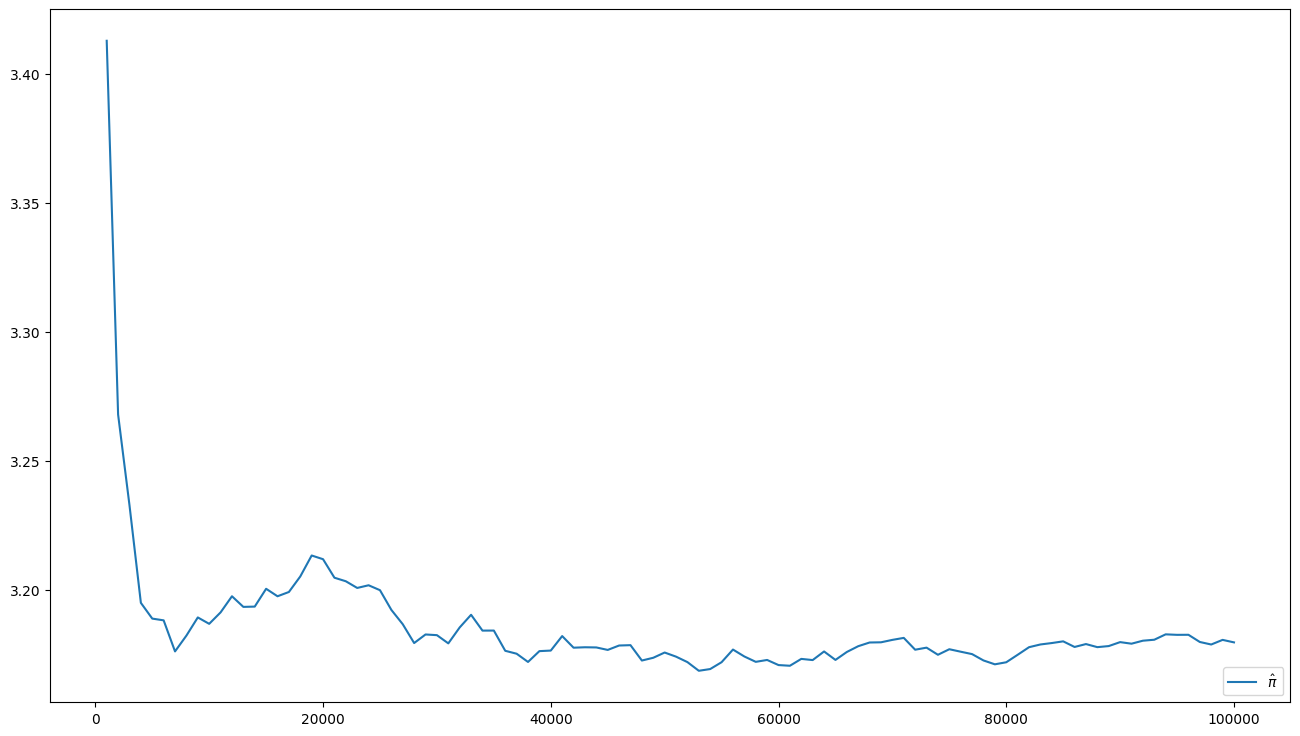

In [11]:
#!/usr/bin/env python3

import math
import matplotlib.pyplot as plt
import numpy as np
import random

def I_Intersect(x, theta, l, d) :
    return 1.0 if x + l * math.cos(theta) > d else 0.0

n = 100000
d = 2.0
l = 1.0
pi_half = 0.5 * math.pi

sample = [I_Intersect(random.uniform(0, d), random.uniform(-pi_half, pi_half), l, d) for i in range(0, n)]

sArray = []
pArray = []
piArray = []

for i in range(1000, n+1, 1000) :
    p = np.average(sample[0:i])
    sArray.append(i)
    pArray.append(p)
    piArray.append((2*l)/(d*p))

fig, axis1 = plt.subplots(1, figsize=(16, 9))
# axis1.plot(sArray, pArray, label=r"$p$")
axis1.plot(sArray, piArray, label=r"$\hat\pi$")
axis1.legend(loc="lower right")


print(f'Estimates:\n\tn: {n}\n\tp: {p:.6f}\n\tpi: {(2*l)/(d*p):.6f}')


__Discussion__

Is this a __valid__ model? It seems quite reasonable, although things could go wrong if the person (or device) tossing the needle onto the table does this in some kind of biased way. How would you test something like this? We will return to this in the chapter 
{ref}`sec:distribution_modeling`. Here one might collect a sample of size $k$ of pairs $(x, \theta)$ and formally test if the observed values of $x$ and $\theta$ are consistent with the specified statistical distributions. Perhaps one will use a __$\chi^2$-test__ or a __Kolmogorov-Smirnov__ (K-S) test for this.

Our model is stochastic, and our estimate of $p$ (or $\pi$) is a point estimate. What can we say about the variance of our estimate? How well have we estimated $\pi$? From Figure {ref}`fig:buffon_needle_pi` we see a fair bit of fluctation as we vary the sample size $n$. We would like to provide some guarantee on the estimate that we provide. This is the topic of {ref}`sec:output_analysis` where we cover the construction of __confidence intervals__ and theory that goes with that. 

Is the model correctly implemented in Python? It is a fairly straightforward code. There is one possible error: when estimating $\pi$, we may end up dividing by zero. Even though this is quite unlikley and of little consequence here, for a more complex simulation model , failing to include such tests can be quite catastrophic. We look at simulation model development more seriously in {ref}`sec:sw_practice`. 

There are other assumptions that have been silently applied, one of which is that we used the python $\texttt{random}$ library. Is $\texttt{random.random}$ a high quality random number generator (RNG)? Yes. But as we will see in {ref}`sec:`, 


